<a href="https://colab.research.google.com/github/Harsh18999/Machine-Learning-Projects/blob/main/Mental_Health_Prediction%20(Kagggle%20Competition)/Mental_Health_Prediction_Code_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import data and independencies**

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c playground-series-s4e11

  0% 0.00/4.55M [00:00<?, ?B/s]
100% 4.55M/4.55M [00:00<00:00, 156MB/s]


In [ ]:
# unzip data file //

import zipfile

with zipfile.ZipFile('playground-series-s4e11.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


In [ ]:
data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
# null values
data.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


# **Data Preprocessing**

###**Feature Analysis and Transformation**

<Figure size 1500x1000 with 0 Axes>

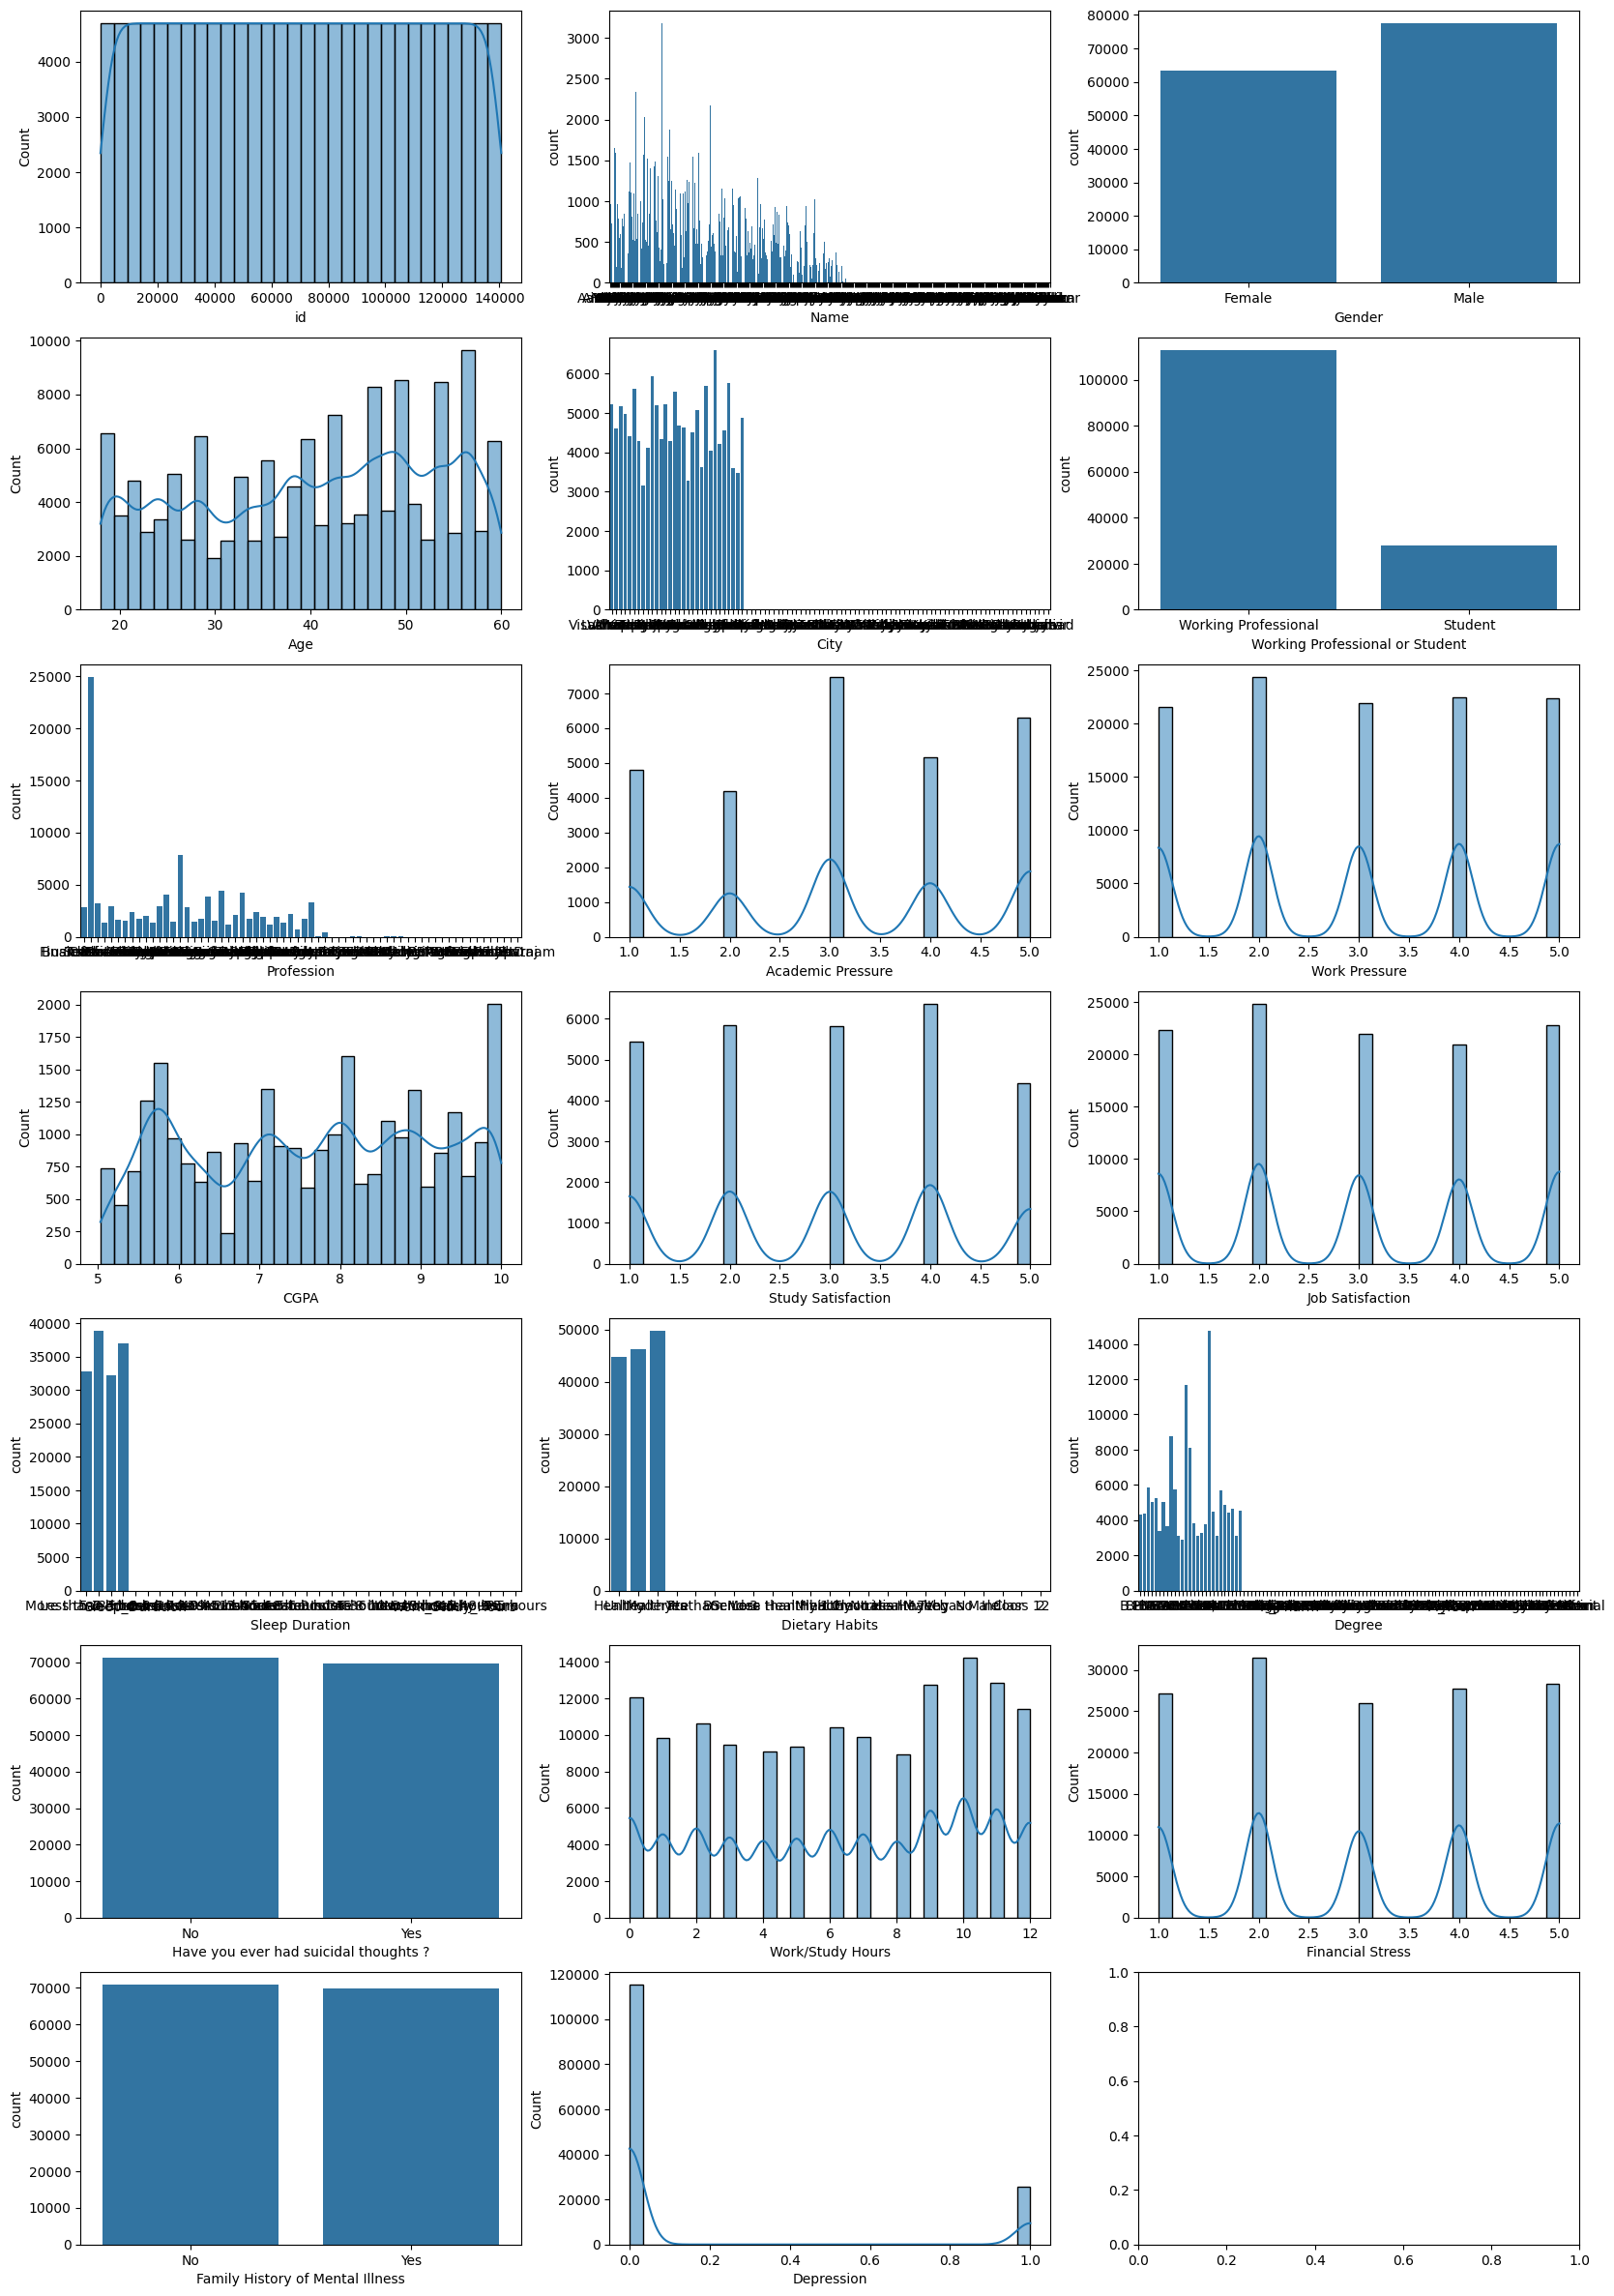

In [ ]:
# distribution of data
numeric_columns = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
fig = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))

for num, col in enumerate(data.columns):

    plt.subplot(7,3,num+1)
    if col in numeric_columns:
       sns.histplot(data[col], bins=30, kde=True)
    else:
      sns.countplot( x=data[col])

###**Feature Transformation**

In [ ]:
# create new features using Job Satisfaction and Study Satisfaction
data['Job/Study Satisfation'] = data['Job Satisfaction'].fillna(data['Study Satisfaction'])
data['Job/Study Satisfation'].isnull().sum()

15

In [ ]:
# create new feature using Work Pressure and Academic Pressure
data['Work/Acadmic Pressure'] = data['Work Pressure'].fillna(data['Academic Pressure'])
data['Work/Acadmic Pressure'].isnull().sum()

21

In [ ]:
# fill null values of profession feature using Working Professional or Student
data['Profession'] = data['Profession'].fillna(data['Working Professional or Student'])
data['Profession'].isnull().sum()

0

In [ ]:
# reduce complexity of categorical feature
cities = dict(data['City'].value_counts())

def func(city):
  if cities[city] > 3000:
    return city
  else:
    return 'Other'

data['City'] = data['City'].apply(func)

In [ ]:
# reduce complexity of categorical feature
professions = dict(data['Profession'].value_counts())

def func(profession):
  if professions[profession] > 390:
    return profession
  else:
    return 'Other'

data['Profession'] = data['Profession'].apply(func)


In [ ]:
# reduce complexity of categorical feature

sleep_duration = dict(data['Sleep Duration'].value_counts())

def func(sleep):
  if sleep_duration[sleep] > 30000:
    return sleep
  else:
    return float('nan')

data['Sleep Duration'] = data['Sleep Duration'].apply(func)


In [ ]:
# reduce complexity of categorical feature
diet = dict(data['Dietary Habits'].value_counts())

def func(_diet):
  if _diet in diet and diet[_diet] > 30000:
    return _diet
  else:
    return float('nan')

data['Dietary Habits'] = data['Dietary Habits'].apply(func)

In [ ]:
# reduce complexity of categorical feature

degree = dict(data['Degree'].value_counts())

def func(deg):
  if deg in degree and degree[deg] > 2800:
    return deg
  else:
    return 'Other'

data['Degree'] = data['Degree'].apply(func)

<Figure size 1500x1000 with 0 Axes>

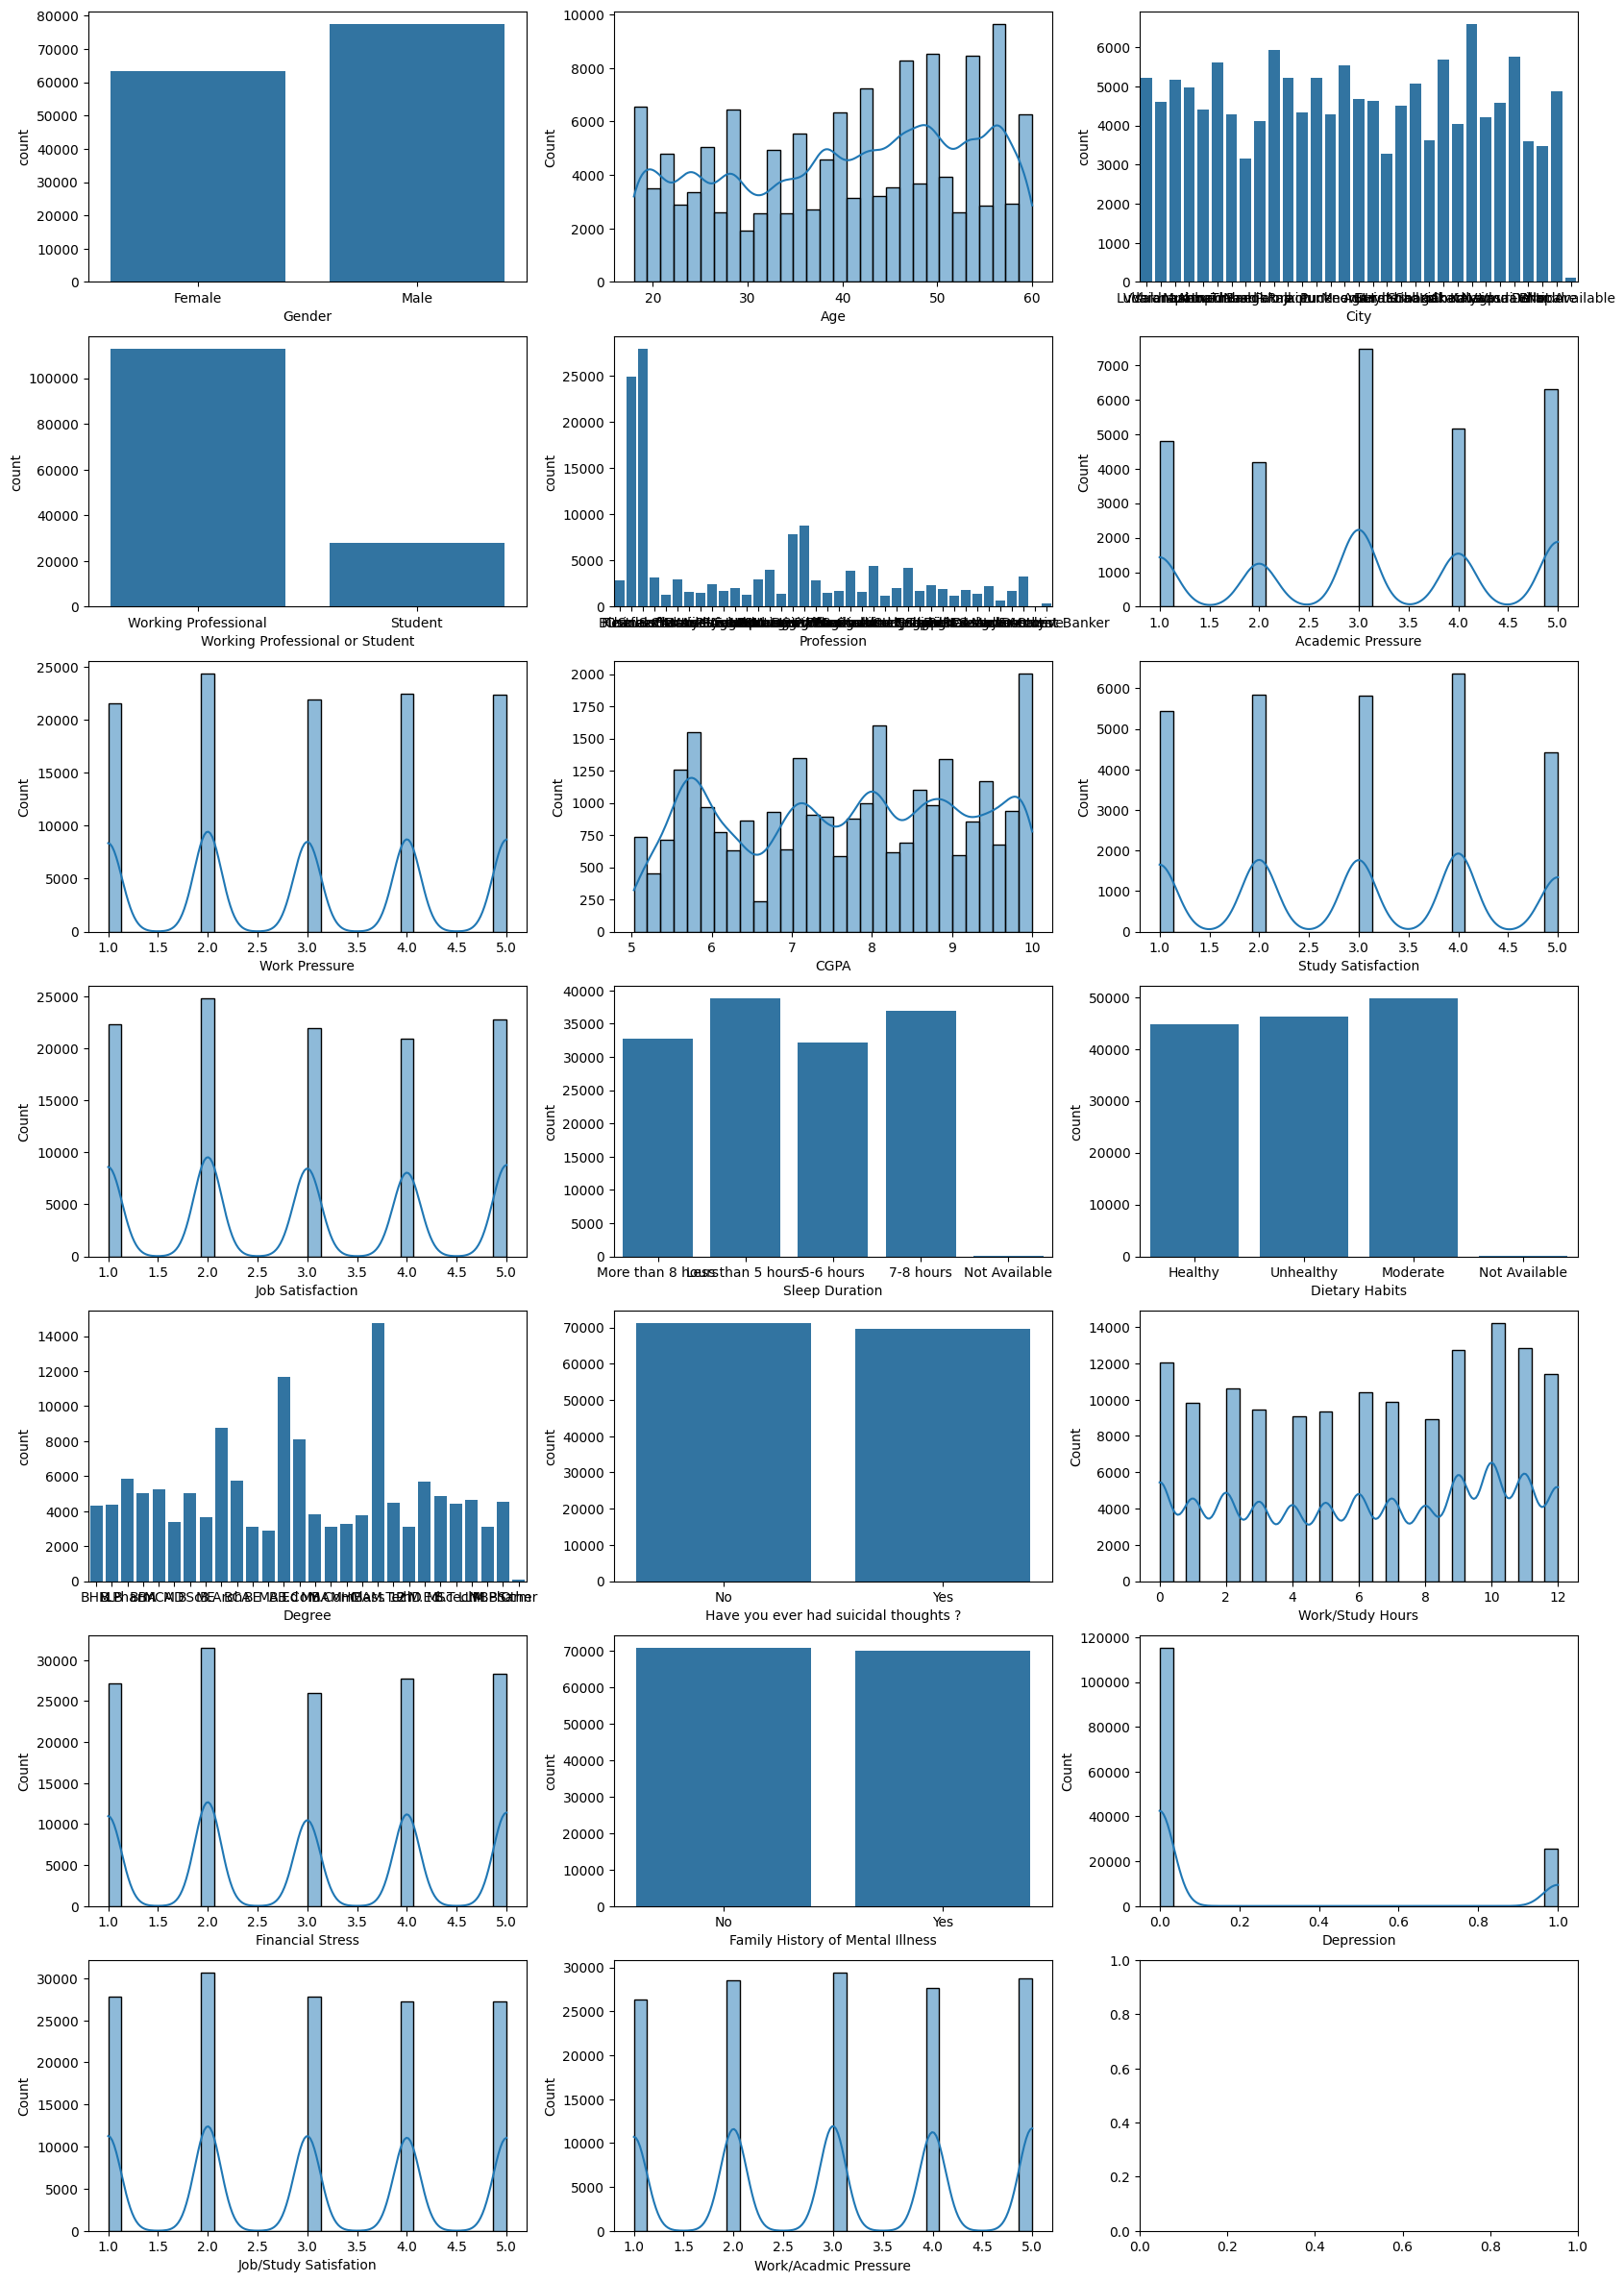

In [ ]:
# distribution of data
numeric_columns = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
fig = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))

for num, col in enumerate(data.columns):

    plt.subplot(7,3,num+1)
    if col in numeric_columns:
       sns.histplot(data[col], bins=30, kde=True)
    else:
      sns.countplot( x=data[col])

<ipython-input-93-4caeb3937e86>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = data[col],hue=data['Depression'])


<Figure size 1500x1000 with 0 Axes>

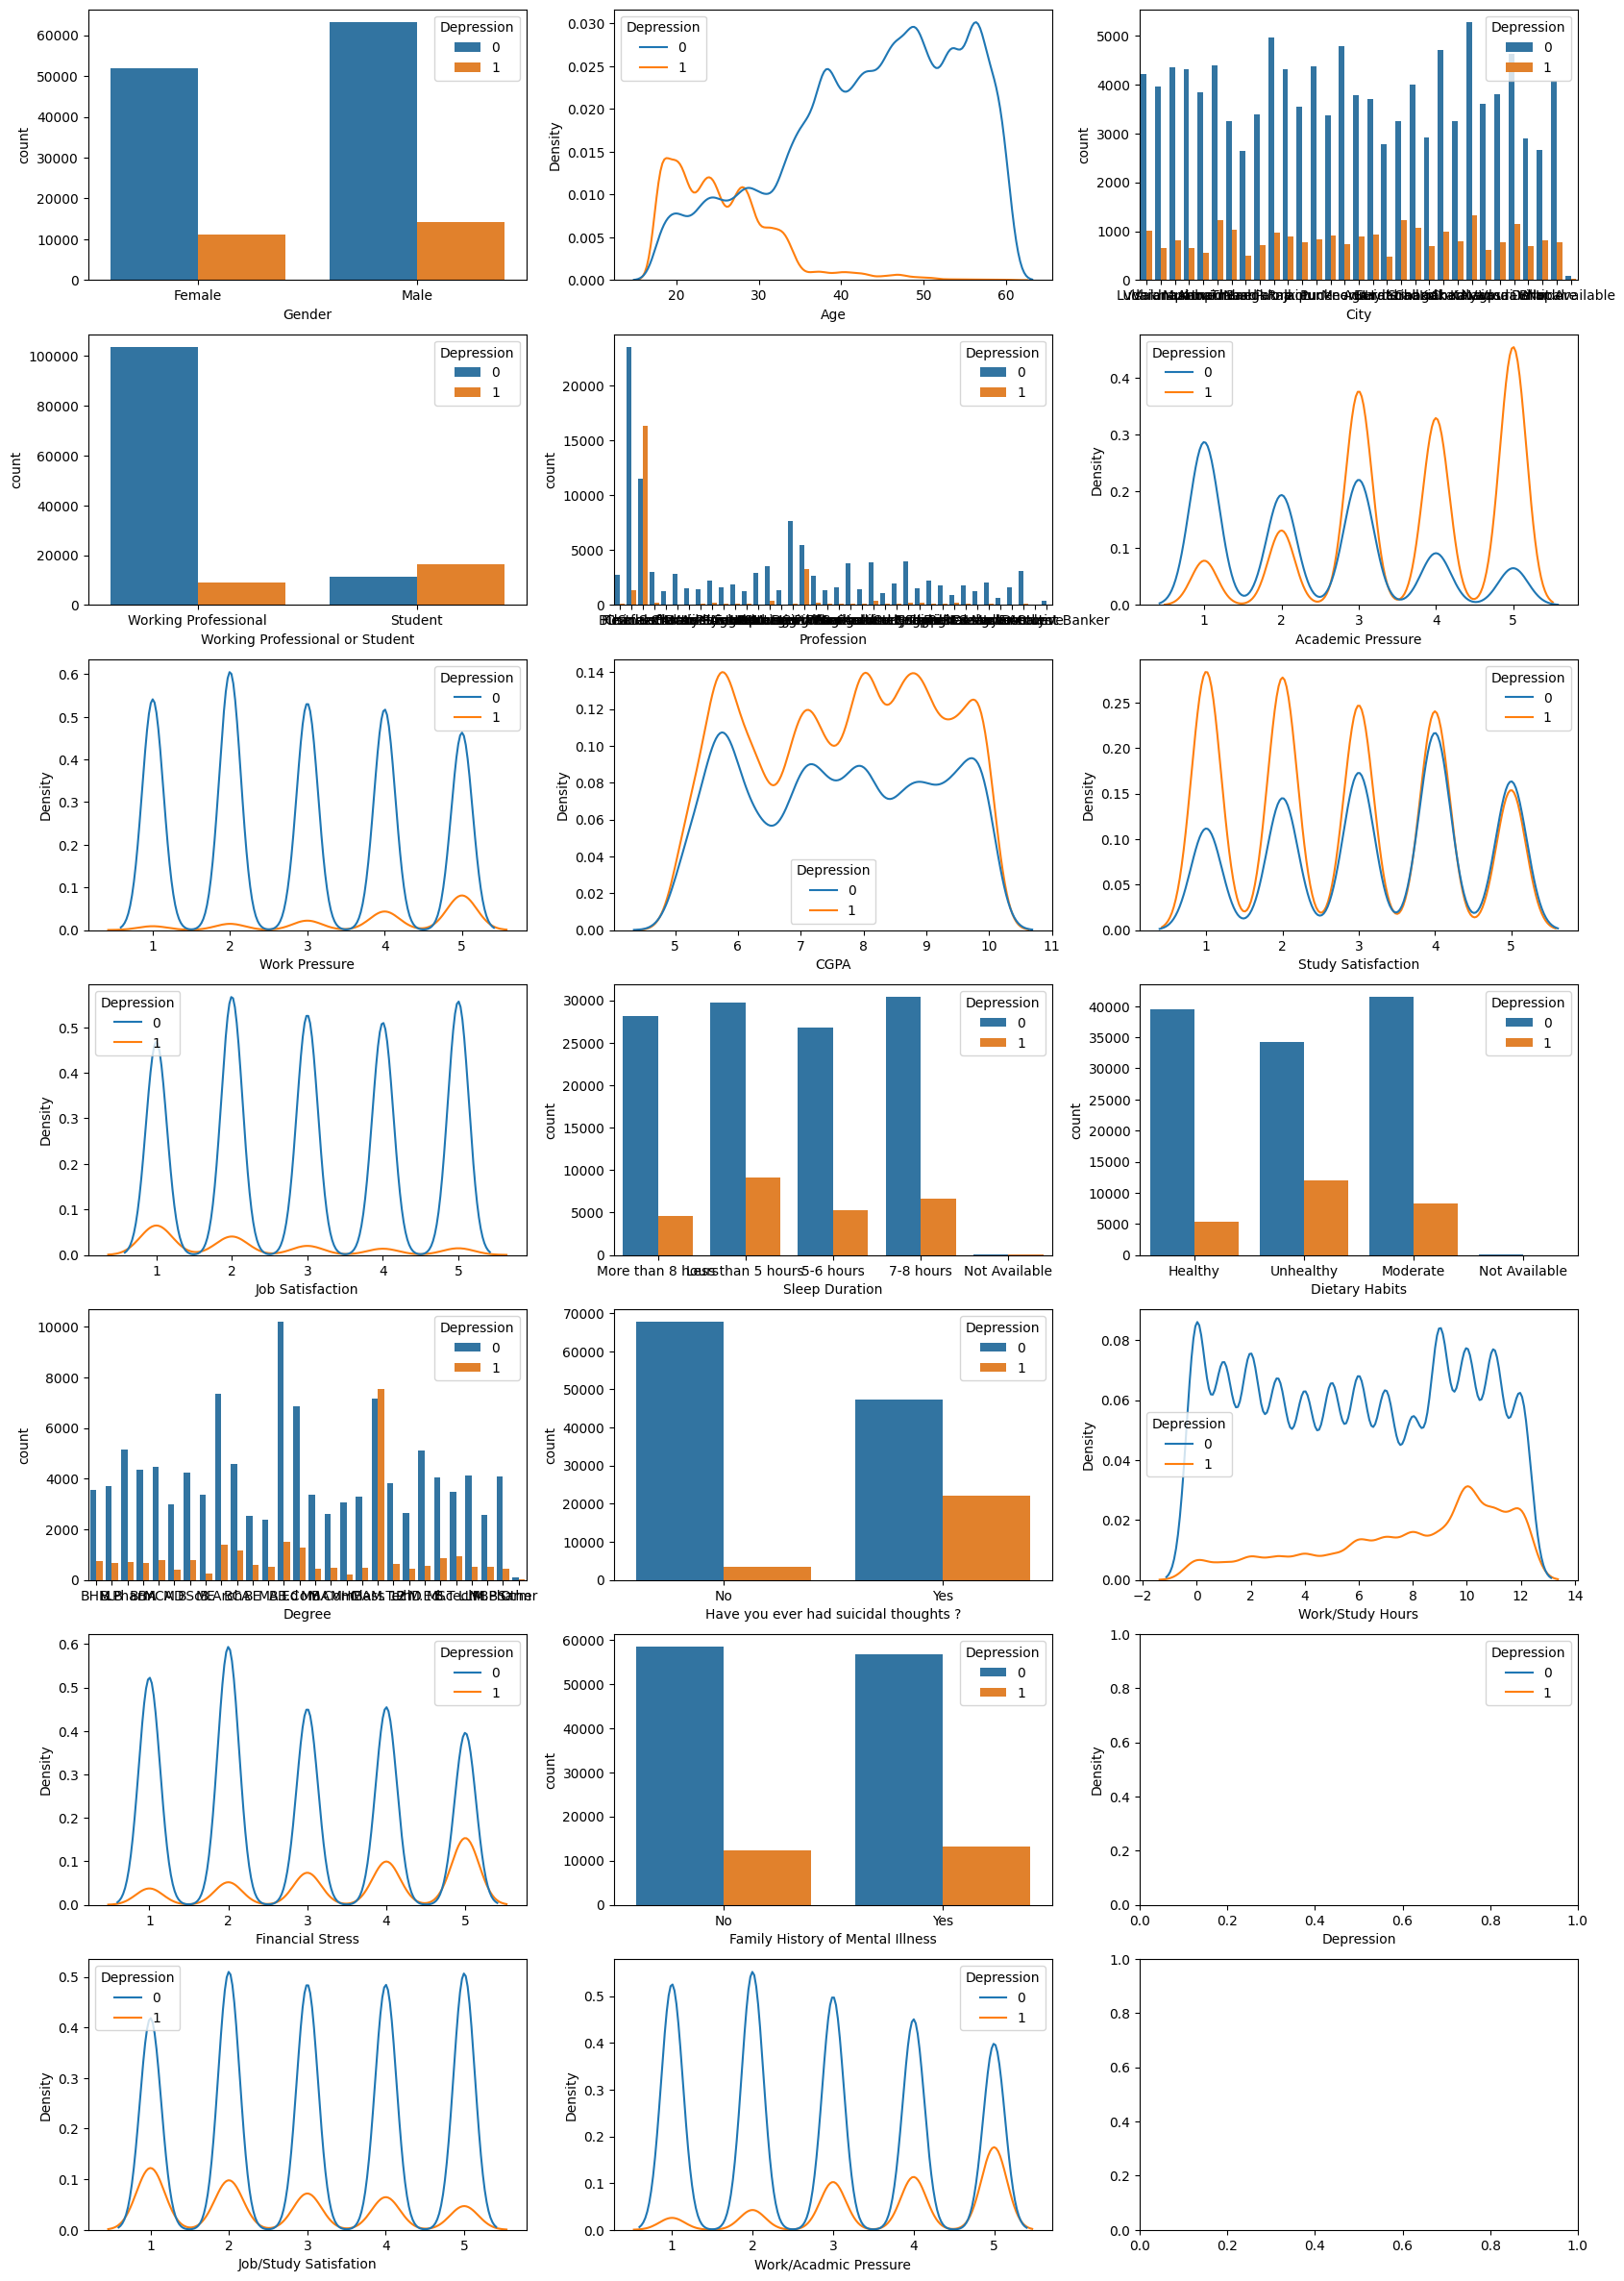

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
fig = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))

for num, col in enumerate(data.columns):

    plt.subplot(7,3,num+1)
    if col in numeric_columns:
       sns.kdeplot(x = data[col],hue=data['Depression'])
    else:
      sns.countplot( x=data[col], hue=data['Depression'])

In [ ]:
# Encode categorical features
transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[[ 'Unhealthy', 'Moderate', 'Healthy']]),['Dietary Habits']),
    ('tnf2',OneHotEncoder(sparse_output=False),['Gender','Degree', 'Sleep Duration', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Working Professional or Student'])
], remainder='passthrough' )

In [ ]:
_data = data.copy()
_data = _data.drop(columns=['Name', 'id', 'CGPA', 'Job Satisfaction', 'Study Satisfaction', 'Work Pressure', 'Academic Pressure'])
_data = _data[_data.notna().all(axis=1)]

transformed_data = transformer.fit(_data)

In [ ]:
# Remain transformation and cleaning

def clean_transform(__data):
  _data = __data.copy()

  cities =['Agra', 'Ahmedabad', 'Bangalore', 'Bhopal', 'Chennai', 'Delhi', 'Faridabad', 'Ghaziabad', 'Hyderabad', 'Indore', 'Jaipur', 'Kalyan', 'Kanpur', 'Kolkata', 'Lucknow', 'Ludhiana', 'Meerut', 'Mumbai', 'Nagpur', 'Nashik', 'Other', 'Patna', 'Pune', 'Rajkot', 'Srinagar', 'Surat', 'Thane', 'Vadodara', 'Varanasi', 'Vasai-Virar', 'Visakhapatnam']
  professions = ['Accountant', 'Architect', 'Business Analyst', 'Chef', 'Chemist', 'Civil Engineer', 'Consultant', 'Content Writer', 'Customer Support', 'Data Scientist', 'Digital Marketer', 'Doctor', 'Educational Consultant', 'Electrician', 'Entrepreneur', 'Finanancial Analyst', 'Financial Analyst', 'Graphic Designer', 'HR Manager', 'Investment Banker', 'Judge', 'Lawyer', 'Manager', 'Marketing Manager', 'Mechanical Engineer', 'Other', 'Pharmacist', 'Pilot', 'Plumber', 'Research Analyst', 'Researcher', 'Sales Executive', 'Software Engineer', 'Student', 'Teacher', 'Travel Consultant', 'UX/UI Designer', 'Working Professional']
  sleep_duration = ['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours']
  diet = ['Healthy', 'Unhealthy', 'Moderate']
  degree = ['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
            'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
            'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
             'MBBS', 'M.Pharm', 'Other']

  _data['Job/Study Satisfation'] = _data['Job Satisfaction'].fillna(_data['Study Satisfaction'])
  _data['Work/Acadmic Pressure'] = _data['Work Pressure'].fillna(_data['Academic Pressure'])
  _data['Profession'] = _data['Profession'].fillna(_data['Working Professional or Student'])
  _data['City'] = _data['City'].apply(lambda x: x if x in cities else 'Other')
  _data['Profession'] = _data['Profession'].apply(lambda x: x if x in professions else 'Other')
  _data['Sleep Duration'] = _data['Sleep Duration'].apply(lambda x: x if x in sleep_duration else 'Other')
  _data['Dietary Habits'] = _data['Dietary Habits'].apply(lambda x: x if x in diet else _data['Dietary Habits'].mode()[0])
  _data['Degree'] = _data['Degree'].apply(lambda x: x if x in degree else 'Other')
  _data.drop(columns = [ 'Name', 'id','City', 'CGPA', 'Job Satisfaction', 'Study Satisfaction', 'Work Pressure', 'Academic Pressure', 'Profession'], inplace=True, axis=1)

  _data = transformer.fit_transform(_data)
  _data = pd.DataFrame(_data, columns=transformer.get_feature_names_out())
  return _data


In [ ]:
transformed_data = clean_transform(data)

In [ ]:
transformed_data.dropna(inplace=True)

In [ ]:
transformed_data

,tnf1__Dietary Habits,tnf2__Gender_Female,tnf2__Gender_Male,tnf2__Degree_B.Arch,tnf2__Degree_B.Com,tnf2__Degree_B.Ed,tnf2__Degree_B.Pharm,tnf2__Degree_B.Tech,tnf2__Degree_BA,tnf2__Degree_BBA,...,tnf2__Family History of Mental Illness_No,tnf2__Family History of Mental Illness_Yes,tnf2__Working Professional or Student_Student,tnf2__Working Professional or Student_Working Professional,remainder__Age,remainder__Work/Study Hours,remainder__Financial Stress,remainder__Depression,remainder__Job/Study Satisfation,remainder__Work/Acadmic Pressure
0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,49.0,1.0,2.0,0.0,2.0,5.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,26.0,7.0,3.0,1.0,3.0,4.0
2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,33.0,3.0,1.0,1.0,2.0,5.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,22.0,10.0,1.0,1.0,1.0,5.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,30.0,9.0,4.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,18.0,2.0,4.0,1.0,4.0,5.0
140696,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,41.0,6.0,5.0,0.0,4.0,5.0
140697,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,24.0,4.0,4.0,0.0,1.0,3.0
140698,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,49.0,10.0,1.0,0.0,2.0,5.0


In [ ]:
X = transformed_data.drop(columns=['remainder__Depression'])
y = transformed_data['remainder__Depression']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=130, learning_rate=0.1, max_depth=6)
model.fit(X, y)
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.943911281723182